<a href="https://colab.research.google.com/github/Ujjwal10228/EDA---Titanic-using-Various-Models/blob/main/EDA_Titanic_using_Various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Data - Titanic Data from Kaggle

In [2]:
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EDA

### Missing data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

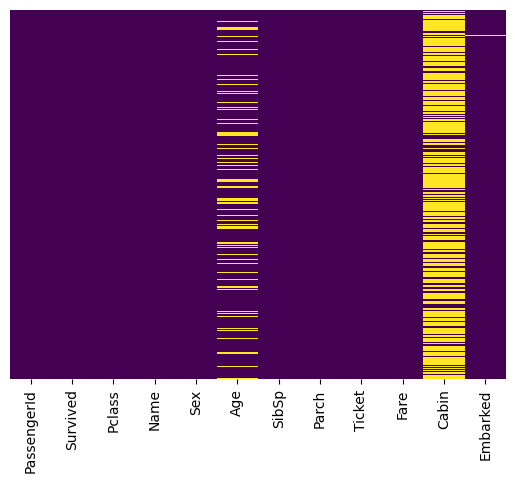

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

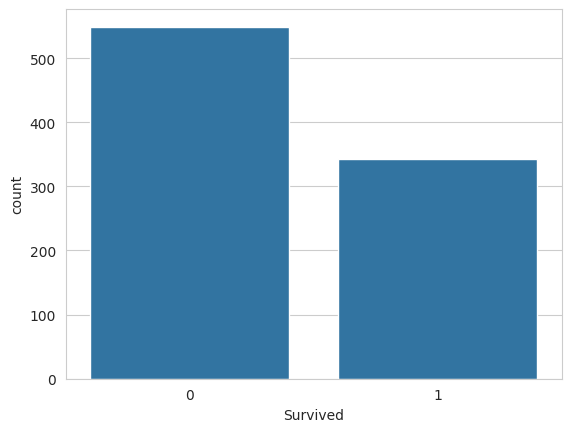

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

In [7]:
sum(train['Survived']==1), sum(train['Survived']==0)

(342, 549)

<Axes: xlabel='Survived', ylabel='count'>

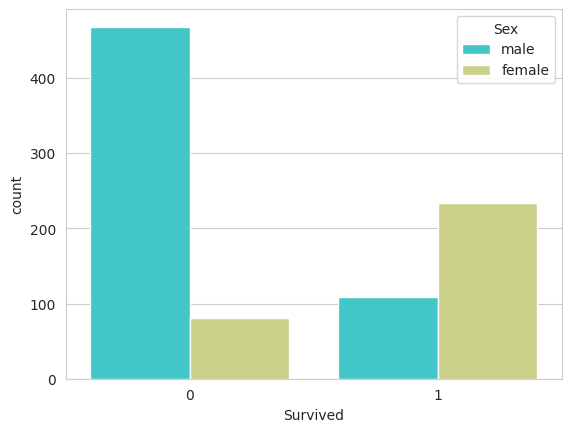

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

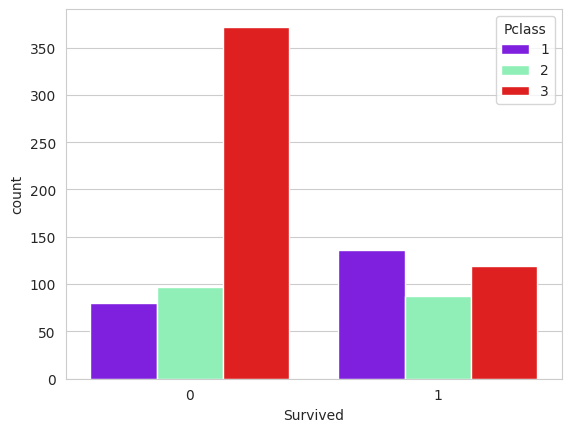

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

/tmp/ipython-input-10-1529031701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, color='red', bins=40)


<Axes: xlabel='Age'>

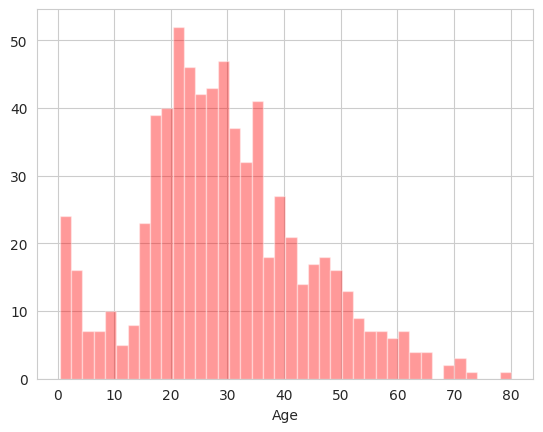

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, color='red', bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

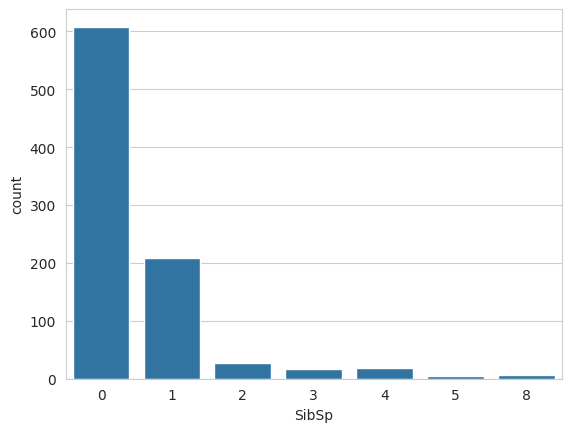

In [11]:
sns.countplot(x='SibSp', data=train)

<Axes: >

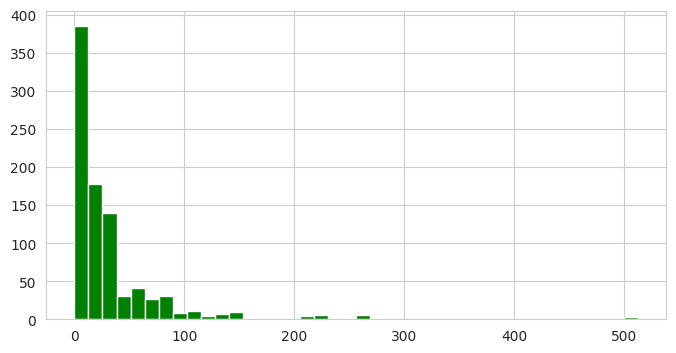

In [12]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

Cufflinks for plots

In [13]:
!pip install cufflinks plotly

import cufflinks as cf
cf.go_offline()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00


### Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

/tmp/ipython-input-14-1440061134.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

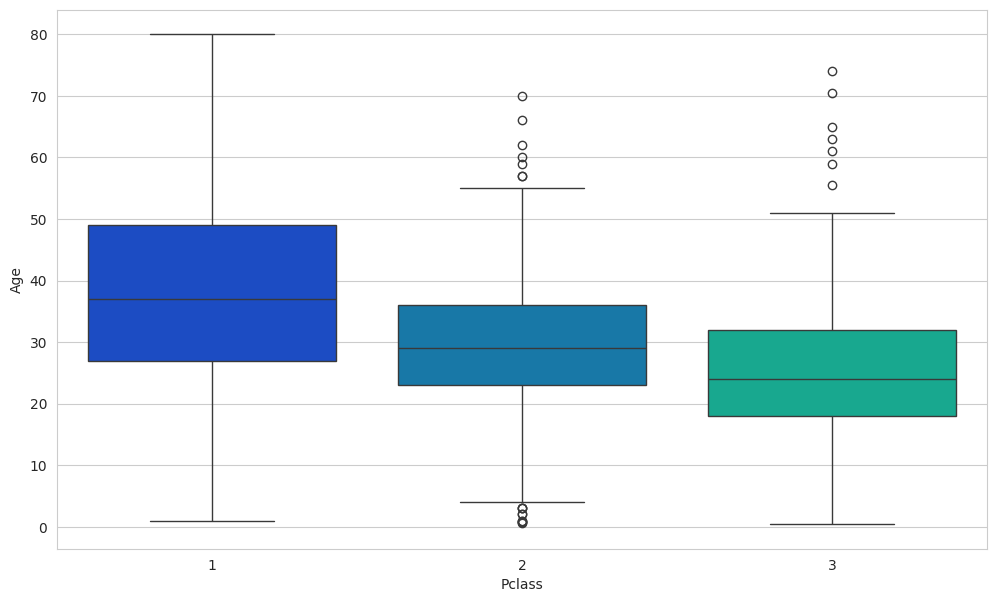

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [15]:
train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [16]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

/tmp/ipython-input-16-357331086.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-16-357331086.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Now let's check heatmap

<Axes: >

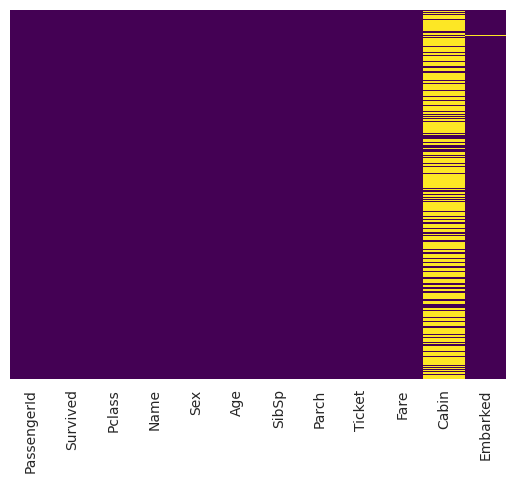

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

 Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.





In [19]:
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [21]:
train.dropna(inplace=True)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [25]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [26]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
train = pd.concat([train, sex, embark], axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

**Train Test Split**

In [30]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [31]:
train['Survived'].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size=0.30, random_state=101)

### Training and Predicting

In [43]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, predictions)
matrix

array([[150,  13],
       [ 37,  67]])

In [46]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8127340823970037

In [47]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

**Evaluation**

We can check precision,recall,f1-score using classification report!

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       163
           1       0.84      0.64      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.81      0.81       267



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': np.int64(5), 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy of Decision Tree with Best Parameters: 81.27%

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       163
           1       0.86      0.62      0.72       104

    accuracy                           0.81       267
   macro avg       0.83      0.78      0.79       267
weighted avg       0.82      0.81      0.80       267



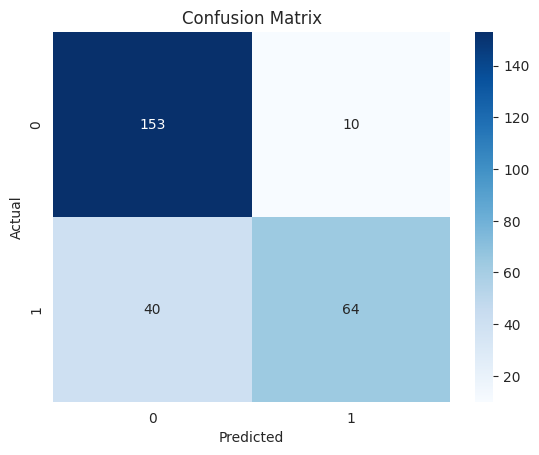

In [50]:
## Define Parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

# Create a Decision Tree model
DT = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best params
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Decision Tree with best params
best_DT = DecisionTreeClassifier(random_state=42, **best_params)
best_DT.fit(X_train, y_train)

# Make predictions on the test set
DT_predict = best_DT.predict(X_test)

# Calculate accuracy on the test set
max_dt_acc = accuracy_score(y_test, DT_predict)
print("Accuracy of Decision Tree with Best Parameters:",
      "{:.2f}%".format(max_dt_acc * 100),
      )

# Display Classification report
print("\nClassification Report: ")
dt_cr = classification_report(y_test, DT_predict)
print(dt_cr)

# Display confusion matrix
DT_cm = confusion_matrix(y_test, DT_predict)

# Plot the confusion matrix
sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Best Hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': np.int64(18), 'weights': 'uniform'}
Best Accuracy of K-Neighbors Classifier: 65.92%

Classification Report - K-Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       163
           1       0.67      0.25      0.36       104

    accuracy                           0.66       267
   macro avg       0.66      0.59      0.57       267
weighted avg       0.66      0.66      0.61       267



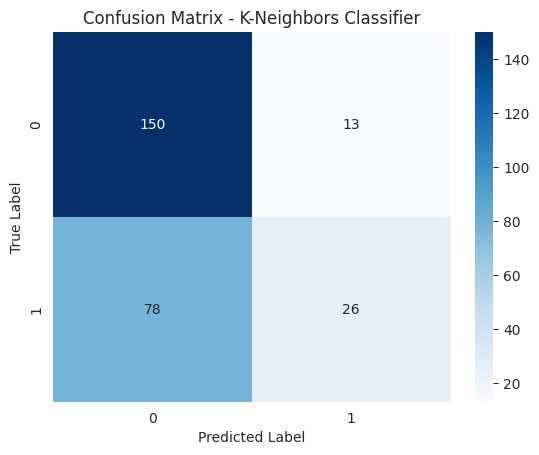

In [51]:
# Define the parameter grid for K-Nearest Neighbors
knn_param_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

# Create a K-Nearest Neighbors model
KNN = KNeighborsClassifier()

# Perform grid search with cross-validation
knn_grid_search = GridSearchCV(KNN, knn_param_grid, cv=5, scoring="accuracy")
knn_grid_search.fit(X_train, y_train)

# get the best params
best_knn_params = knn_grid_search.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_knn_params)

# Train aKNN model with best parameter
best_KNN_model = KNeighborsClassifier(**best_knn_params)
best_KNN_model.fit(X_train, y_train)

# Make predictions on the test set
KNN_predict = best_KNN_model.predict(X_test)

# Calculate accuracy on the test set
best_KNN_acc = accuracy_score(y_test, KNN_predict)
print("Best Accuracy of K-Neighbors Classifier:", "{:.2f}%".format(best_KNN_acc * 100))

# Display classification report
print("\nClassification Report - K-Neighbors Classifier:")
knn_cr = classification_report(y_test, KNN_predict)
print(knn_cr)

# Display confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_predict)

# Plot the confusion matrix
sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Best Hyperparameters for Support Vector Classifier: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy of Support Vector Classifier: 67.79%

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.67      0.91      0.78       163
           1       0.70      0.31      0.43       104

    accuracy                           0.68       267
   macro avg       0.68      0.61      0.60       267
weighted avg       0.68      0.68      0.64       267



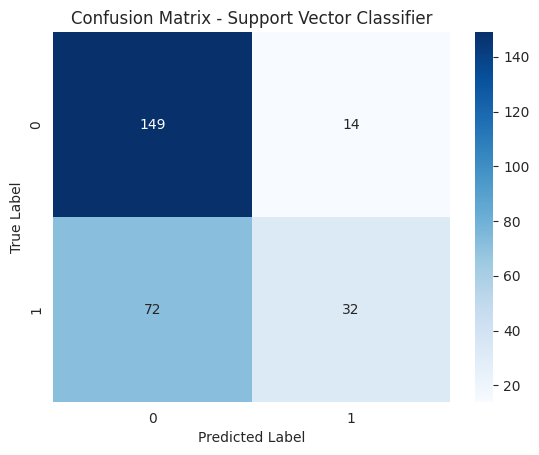

In [52]:
# define parameter grid for Support Vector Classifier
svm_param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],
    "kernel": ["rbf"],
}

# Create a Support Vector Classifier model
SVM = SVC()

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(SVM, svm_param_grid, cv=5, scoring="accuracy")
svm_grid_search.fit(X_train, y_train)

# get the best params
best_svm_params = svm_grid_search.best_params_
print("Best Hyperparameters for Support Vector Classifier:", best_svm_params)

# Train a Support Vector Classifier model with the best parameters
best_SVM_model = SVC(**best_svm_params)
best_SVM_model.fit(X_train, y_train)

# Make predictions on the test set
SVM_predict = best_SVM_model.predict(X_test)

# Calculate accuracy on the test set
best_SVM_acc = accuracy_score(y_test, SVM_predict)
print(
    "Best Accuracy of Support Vector Classifier:", "{:.2f}%".format(best_SVM_acc * 100)
)

# Display classification report
print("\nClassification Report - Support Vector Classifier:")
svm_cr = classification_report(y_test, SVM_predict)
print(svm_cr)

# Display confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_predict)

# Plot the confusion matrix
sns.heatmap(SVM_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy of Naive Bayes model: 80.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



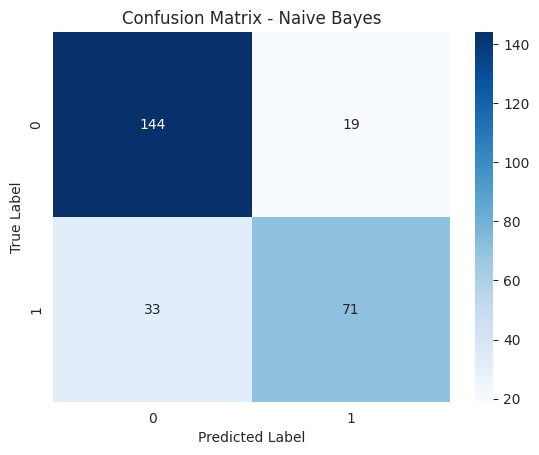

In [53]:
# Create a Naive Bayes model
NB = GaussianNB()

NB.fit(X_train, y_train)

NB_predict = NB.predict(X_test)

NB_acc_score = accuracy_score(y_test, NB_predict)

print("Accuracy of Naive Bayes model:", "{:.2f}%".format(NB_acc_score * 100))

print("\nClassification Report:")
nb_cr = classification_report(y_test, NB_predict)
print(nb_cr)

NB_cm = confusion_matrix(y_test, NB_predict)

sns.heatmap(NB_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

Best Hyperparameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 150, 'random_state': 42}
Best Accuracy of AdaBoost model: 79.78%

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.78      0.67      0.72       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.79       267



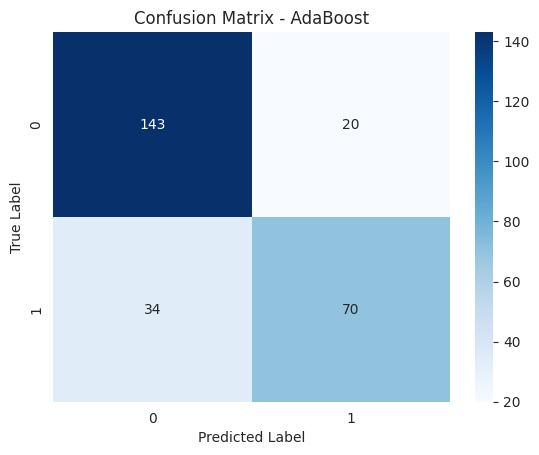

In [54]:
# Define the parameter grid for AdaBoost
ab_param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1],
    "random_state": [42],
}

# Create an AdaBoost model
adaboost_classifier = AdaBoostClassifier()

# Perform grid search with cross-validation
ab_grid_search = GridSearchCV(
    adaboost_classifier, ab_param_grid, cv=5, scoring="accuracy"
)
ab_grid_search.fit(X_train, y_train)

# Get the best parameters
best_ab_params = ab_grid_search.best_params_
print("Best Hyperparameters for AdaBoost:", best_ab_params)

# Train an AdaBoost model with the best parameters
best_adaboost_model = AdaBoostClassifier(**best_ab_params)
best_adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_predict = best_adaboost_model.predict(X_test)

# Calculate accuracy on the test set
adaboost_acc_score = accuracy_score(y_test, adaboost_predict)
print("Best Accuracy of AdaBoost model:", "{:.2f}%".format(adaboost_acc_score * 100))

# Display classification report
print("\nClassification Report - AdaBoost:")
ab_cr = classification_report(y_test, adaboost_predict)
print(ab_cr)

# Display confusion matrix
adaboost_cm = confusion_matrix(y_test, adaboost_predict)

# Plot the confusion matrix
sns.heatmap(adaboost_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 12}
Best Accuracy of Random Forest: 84.27%

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.84      0.74      0.79       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



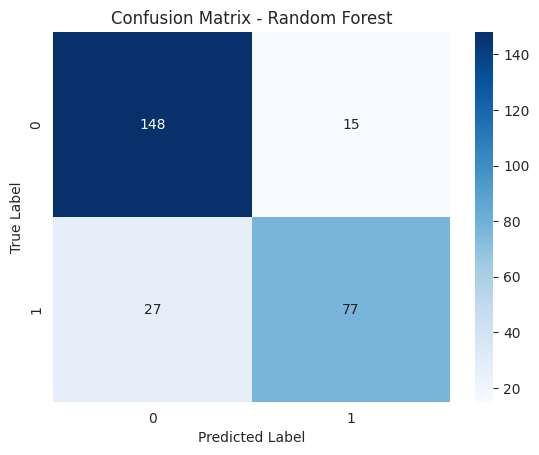

In [55]:

# Define the parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [12],
}

# Create a Random Forest model
RF = RandomForestClassifier()

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(RF, rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

# Train a Random Forest model with the best parameters
best_RF_model = RandomForestClassifier(**best_rf_params)
best_RF_model.fit(X_train, y_train)

# Make predictions on the test set
RF_predict = best_RF_model.predict(X_test)

# Calculate accuracy on the test set
best_RF_acc = accuracy_score(y_test, RF_predict)
print("Best Accuracy of Random Forest:", "{:.2f}%".format(best_RF_acc * 100))

# Display classification report
print("\nClassification Report - Random Forest:")
rf_cr = classification_report(y_test, RF_predict)
print(rf_cr)

# Display confusion matrix
RF_cm = confusion_matrix(y_test, RF_predict)

# Plot the confusion matrix
sns.heatmap(RF_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
## Create a dictionary to store the models and their accuracies
models_accuracy = {
    "Logistic Regression": accuracy,
    "Decision Tree": max_dt_acc,
    "Random Forest": best_RF_acc,
    "Naive Bayes": NB_acc_score,
    "KNN": best_KNN_acc,
    "SVM": best_SVM_acc,
    "AdaBoost": adaboost_acc_score,
}

# Find the model with the highest accuracy
best_model = max(models_accuracy, key=models_accuracy.get)
best_accuracy = models_accuracy[best_model]


# Create a DataFrame for comparision
comparison = pd.DataFrame(
    {
        "Model": list(models_accuracy.keys()),
        "Accuracy": [ "{:.2f}%".format(acc * 100) for acc in models_accuracy.values()],
    }
)

print("Comparison Table:")
print(comparison)

# Print the name and accuracy of the best model
print("\nBest Model:")
print(f"{best_model}: {best_accuracy:.2%}")

Comparison Table:
                 Model Accuracy
0  Logistic Regression   81.27%
1        Decision Tree   81.27%
2        Random Forest   84.27%
3          Naive Bayes   80.52%
4                  KNN   65.92%
5                  SVM   67.79%
6             AdaBoost   79.78%

Best Model:
Random Forest: 84.27%


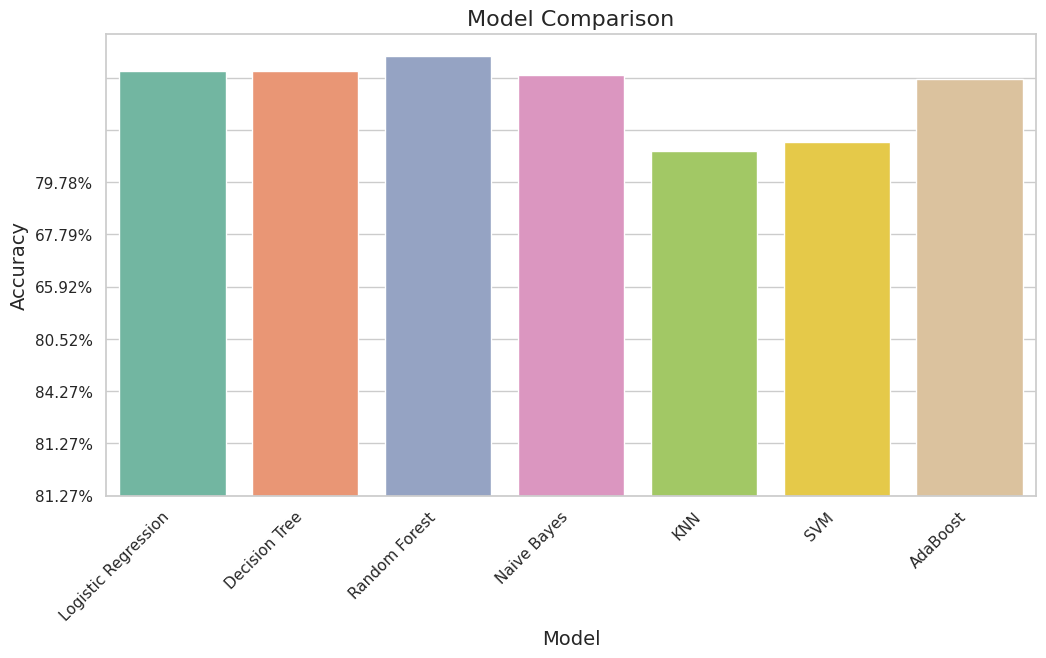

In [59]:
# Multiply values by 100 and format to 2 decimal places
y_values = [value * 100 for value in models_accuracy.values()]
y_labels = ["{:.2f}%".format(value) for value in y_values]

# Create a color palette with sufficient contrast
colors = sns.color_palette("Set2", len(models_accuracy))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)

# Set y-axis labels
ax.set_yticklabels(y_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.title("Model Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.show()

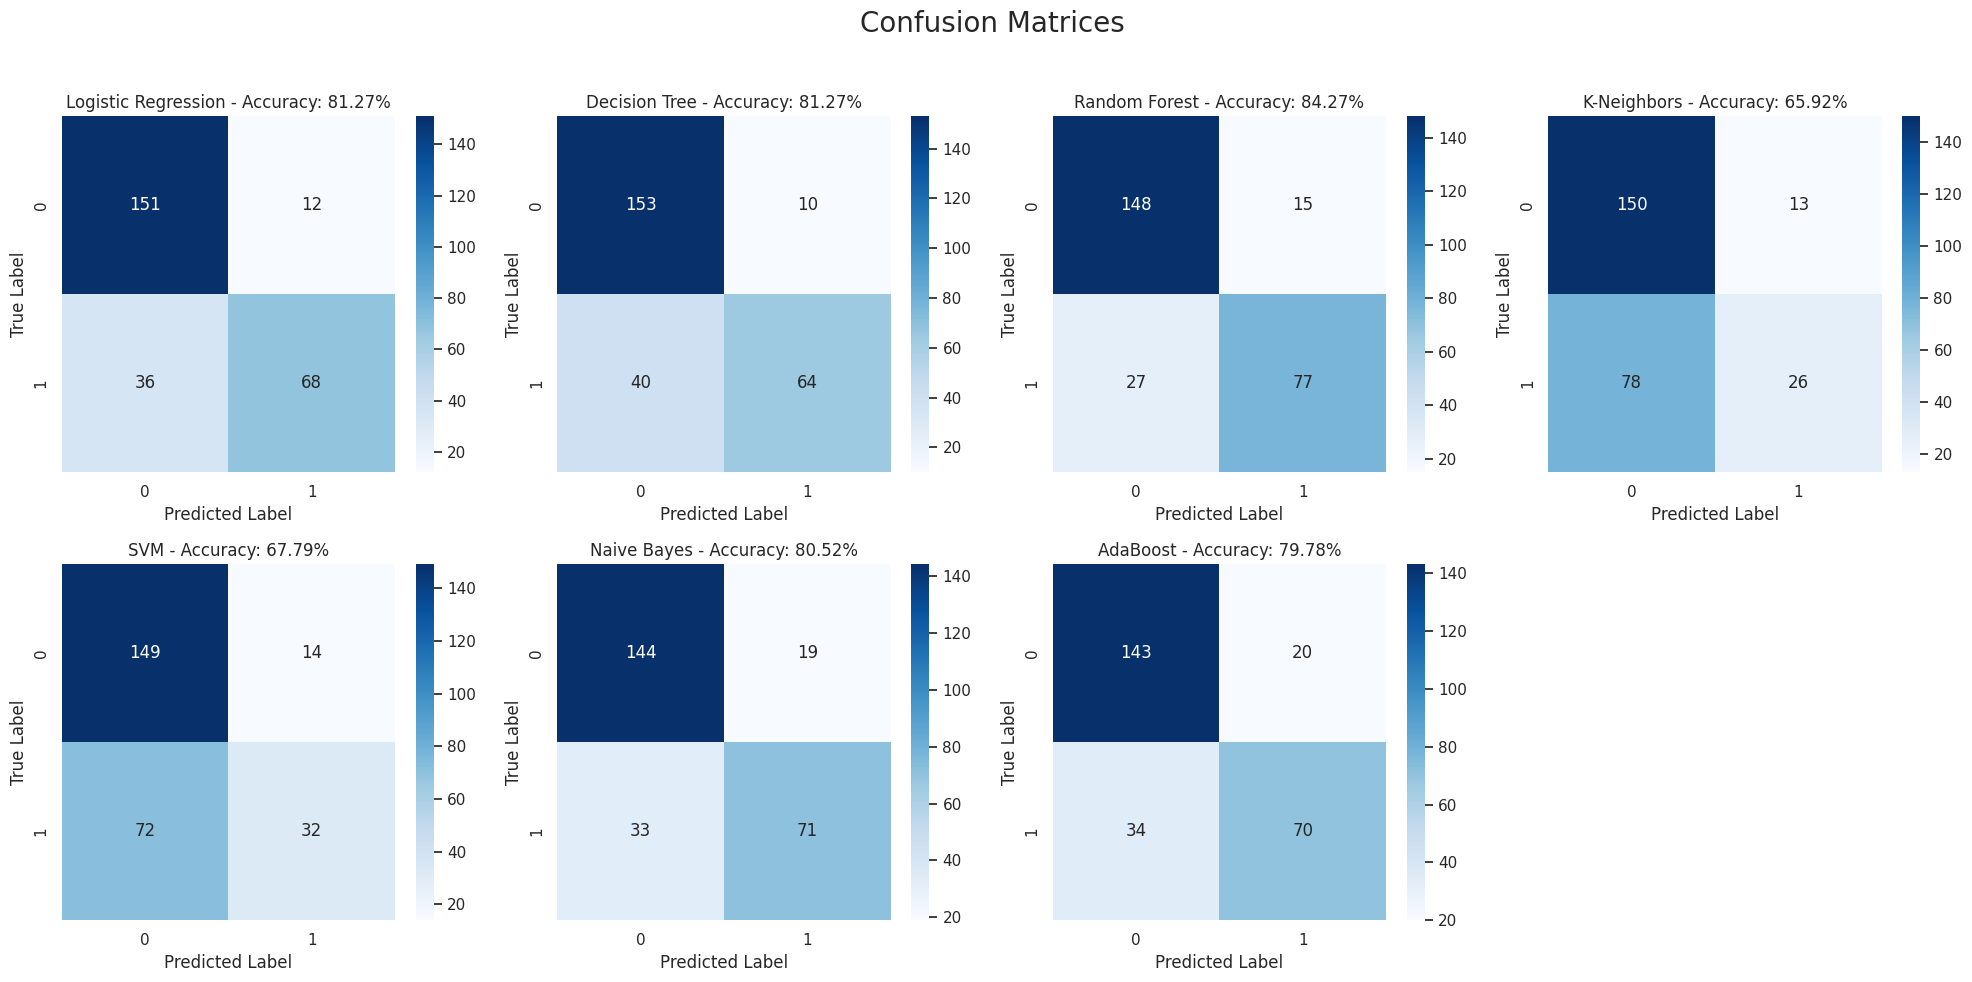

In [60]:
num_classifiers = 7
num_rows = (num_classifiers - 1) // 4 + 1
num_cols = min(num_classifiers, 4)

fig, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows)
)
fig.suptitle("Confusion Matrices", fontsize=20)

classifiers = [
    ("Logistic Regression", logreg_cm, accuracy),
    ("Decision Tree", DT_cm, max_dt_acc),
    ("Random Forest", RF_cm, best_RF_acc),
    ("K-Neighbors", KNN_cm, best_KNN_acc),
    ("SVM", SVM_cm, best_SVM_acc),
    ("Naive Bayes", NB_cm, NB_acc_score),
    ("AdaBoost", adaboost_cm, adaboost_acc_score),
]

for (name, cm, acc_score), ax in zip(classifiers, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f"{name} - Accuracy: {acc_score * 100:.2f}%")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


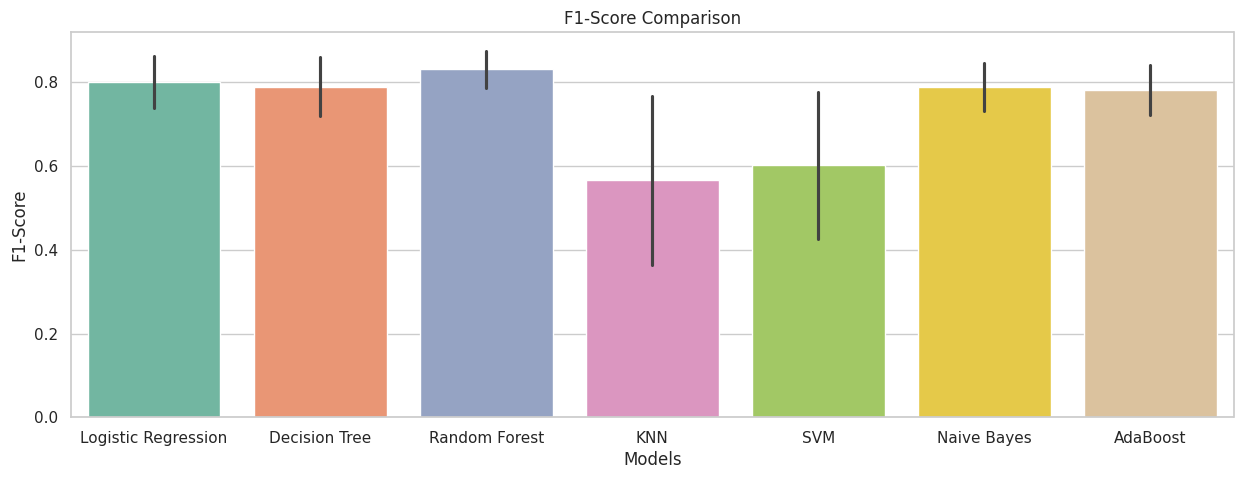

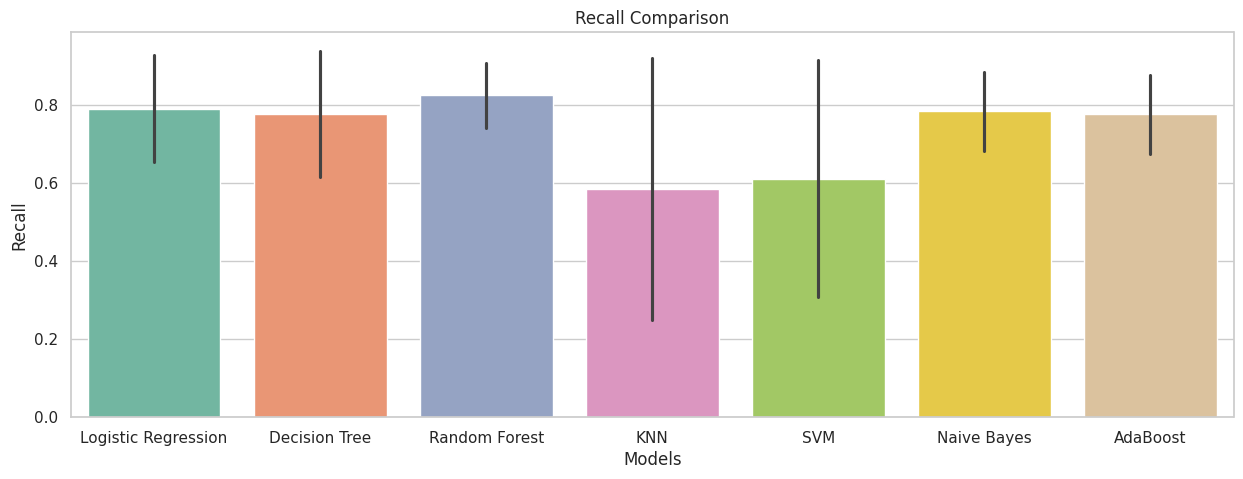

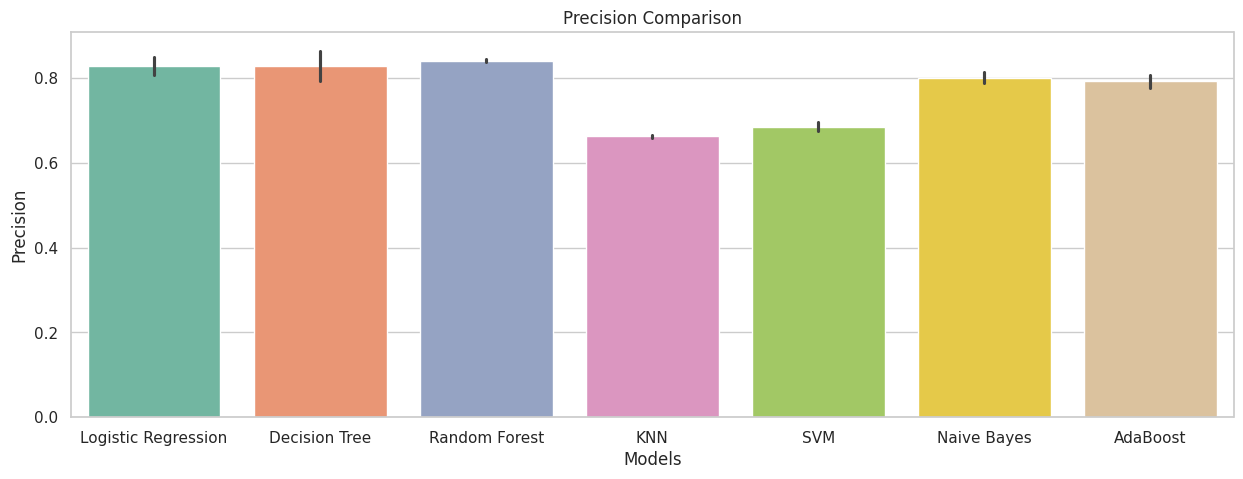

In [61]:
# Get classification reports as dictionaries
lr_cr = classification_report(y_test, logreg_predict, output_dict=True)
dt_cr = classification_report(y_test, DT_predict, output_dict=True)
rf_cr = classification_report(y_test, RF_predict, output_dict=True)
knn_cr = classification_report(y_test, KNN_predict, output_dict=True)
svm_cr = classification_report(y_test, SVM_predict, output_dict=True)
nb_cr = classification_report(y_test, NB_predict, output_dict=True)
ab_cr = classification_report(y_test, adaboost_predict, output_dict=True)

classification_reports = [lr_cr, dt_cr, rf_cr, knn_cr, svm_cr, nb_cr, ab_cr]

f1_scores = {}
recall_scores = {}
precision_scores = {}

# Store f1-score, recall, and precision scores in lists
for name, cr in zip(
    [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "SVM",
        "Naive Bayes",
        "AdaBoost",
    ],
    classification_reports,
):
    f1_scores[name] = [
        cr[label]["f1-score"] for label in cr.keys() if label.isnumeric()
    ]
    recall_scores[name] = [
        cr[label]["recall"] for label in cr.keys() if label.isnumeric()
    ]
    precision_scores[name] = [
        cr[label]["precision"] for label in cr.keys() if label.isnumeric()
    ]

# Create pandas dataframes from the lists
df_f1 = pd.DataFrame(
    f1_scores, index=[str(i) for i in range(1, len(f1_scores["Decision Tree"]) + 1)]
)
df_recall = pd.DataFrame(
    recall_scores,
    index=[str(i) for i in range(1, len(recall_scores["Decision Tree"]) + 1)],
)
df_precision = pd.DataFrame(
    precision_scores,
    index=[str(i) for i in range(1, len(precision_scores["Decision Tree"]) + 1)],
)

# Plot accuracy comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_f1, palette="Set2")
plt.title("F1-Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.show()

# Plot recall comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_recall, palette="Set2")
plt.title("Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

# Plot precision comparison
plt.figure(figsize=(15, 5))
sns.barplot(data=df_precision, palette="Set2")
plt.title("Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy of Gradient Boosting: 82.02%

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       163
           1       0.81      0.70      0.75       104

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



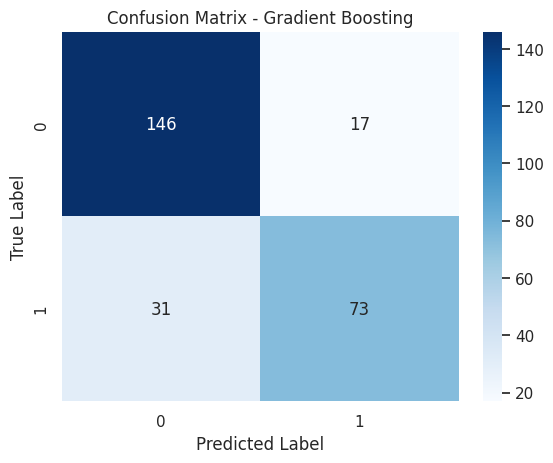

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create a Gradient Boosting model
GB = GradientBoostingClassifier(random_state=12)

# Perform grid search with cross-validation
gb_grid_search = GridSearchCV(GB, gb_param_grid, cv=5, scoring="accuracy")
gb_grid_search.fit(X_train, y_train)

# Get the best parameters
best_gb_params = gb_grid_search.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_gb_params)

# Train a Gradient Boosting model with the best parameters
best_GB_model = GradientBoostingClassifier(**best_gb_params, random_state=12)
best_GB_model.fit(X_train, y_train)

# Make predictions on the test set
GB_predict = best_GB_model.predict(X_test)

# Calculate accuracy on the test set
best_GB_acc = accuracy_score(y_test, GB_predict)
print("Best Accuracy of Gradient Boosting:", "{:.2f}%".format(best_GB_acc * 100))

# Display classification report
print("\nClassification Report - Gradient Boosting:")
gb_cr = classification_report(y_test, GB_predict)
print(gb_cr)

# Display confusion matrix
GB_cm = confusion_matrix(y_test, GB_predict)

# Plot the confusion matrix
sns.heatmap(GB_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()